In [68]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

In [136]:
all_df.to_csv("Dashboard/all_df.csv", index=False)

# DATA WRAGLING 

***GATHERING DATA***

In [69]:
df_aotizhongxin = pd.read_csv('Data/PRSA_Data_Aotizhongxin.csv')
df_aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [70]:
df_changping = pd.read_csv('Data/PRSA_Data_Changping.csv')
df_changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [71]:
df_dingling = pd.read_csv('Data/PRSA_Data_Dingling.csv')
df_dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [72]:
df_dongsi = pd.read_csv('Data/PRSA_Data_Dongsi.csv')
df_dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [73]:
df_guanyuan = pd.read_csv('Data/PRSA_Data_Guanyuan.csv')
df_guanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [74]:
df_gucheng = pd.read_csv('Data/PRSA_Data_Gucheng.csv')
df_gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [75]:
df_huairou = pd.read_csv('Data/PRSA_Data_Huairou.csv')
df_huairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [76]:
df_nongzhanguan = pd.read_csv('Data/PRSA_Data_Nongzhanguan.csv')
df_nongzhanguan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [77]:
df_shunyi = pd.read_csv('Data/PRSA_Data_Shunyi.csv')
df_shunyi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [78]:
df_tiantan = pd.read_csv('Data/PRSA_Data_Tiantan.csv')
df_tiantan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [79]:
df_wanliu = pd.read_csv('Data/PRSA_Data_Wanliu.csv')
df_wanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [80]:
df_wanshouxigong = pd.read_csv('Data/PRSA_Data_Wanshouxigong.csv')
df_wanshouxigong.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


***ASSESING DATA***

In [81]:
df_aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [82]:
df_aotizhongxin.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [83]:
df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [84]:
df_changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [85]:
df_dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [86]:
df_dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [87]:
df_guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [88]:
df_guanyuan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [89]:
df_gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [90]:
df_gucheng.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [91]:
df_huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [92]:
df_huairou.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [93]:
df_nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [94]:
df_nongzhanguan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [95]:
df_shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [96]:
df_shunyi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [97]:
df_tiantan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [98]:
df_tiantan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [99]:
df_wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [100]:
df_wanliu.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [101]:
df_wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [102]:
df_wanshouxigong.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

***CLEANING DATA***

In [103]:
# Teknik Median
df_aotizhongxin['PM2.5'] = df_aotizhongxin['PM2.5'].fillna(df_aotizhongxin['PM2.5'].median())
df_aotizhongxin['PM10'] = df_aotizhongxin['PM10'].fillna(df_aotizhongxin['PM10'].median())
df_aotizhongxin['SO2'] = df_aotizhongxin['SO2'].fillna(df_aotizhongxin['SO2'].median())
df_aotizhongxin['NO2'] = df_aotizhongxin['NO2'].fillna(df_aotizhongxin['NO2'].median())
df_aotizhongxin['CO'] = df_aotizhongxin['CO'].fillna(df_aotizhongxin['CO'].median())
df_aotizhongxin['O3'] = df_aotizhongxin['O3'].fillna(df_aotizhongxin['O3'].median())

# Teknik interpolasi
df_aotizhongxin['TEMP'] = df_aotizhongxin['TEMP'].interpolate(method='linear')
df_aotizhongxin['PRES'] = df_aotizhongxin['PRES'].interpolate(method='linear')
df_aotizhongxin['DEWP'] = df_aotizhongxin['DEWP'].interpolate(method='linear')
df_aotizhongxin['RAIN'] = df_aotizhongxin['RAIN'].interpolate(method='linear')
df_aotizhongxin['WSPM'] = df_aotizhongxin['WSPM'].interpolate(method='linear')

# Teknik Modus
df_aotizhongxin['wd'] = df_aotizhongxin['wd'].fillna(df_aotizhongxin['wd'].mode()[0])

df_aotizhongxin.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [104]:
# Teknik Median

df_changping['PM2.5'] = df_changping['PM2.5'].fillna(df_changping['PM2.5'].median())
df_changping['PM10'] = df_changping['PM10'].fillna(df_changping['PM10'].median())
df_changping['SO2'] = df_changping['SO2'].fillna(df_changping['SO2'].median())
df_changping['NO2'] = df_changping['NO2'].fillna(df_changping['NO2'].median())
df_changping['CO'] = df_changping['CO'].fillna(df_changping['CO'].median())
df_changping['O3'] = df_changping['O3'].fillna(df_changping['O3'].median())

# Teknik Interpolasi

df_changping['TEMP'] = df_changping['TEMP'].interpolate(method='linear')
df_changping['PRES'] = df_changping['PRES'].interpolate(method='linear')
df_changping['DEWP'] = df_changping['DEWP'].interpolate(method='linear')
df_changping['RAIN'] = df_changping['RAIN'].interpolate(method='linear')
df_changping['WSPM'] = df_changping['WSPM'].interpolate(method='linear')

# Teknik Modus
df_changping['wd'] = df_changping['wd'].fillna(df_changping['wd'].mode()[0])

df_changping.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [105]:
# Teknik Median

df_dingling['PM2.5'] = df_dingling['PM2.5'].fillna(df_dingling['PM2.5'].median())
df_dingling['PM10'] = df_dingling['PM10'].fillna(df_dingling['PM10'].median())
df_dingling['SO2'] = df_dingling['SO2'].fillna(df_dingling['SO2'].median())
df_dingling['NO2'] = df_dingling['NO2'].fillna(df_dingling['NO2'].median())
df_dingling['CO'] = df_dingling['CO'].fillna(df_dingling['CO'].median())
df_dingling['O3'] = df_dingling['O3'].fillna(df_dingling['O3'].median())

# Teknik Interpolasi

df_dingling['TEMP'] = df_dingling['TEMP'].interpolate(method='linear')
df_dingling['PRES'] = df_dingling['PRES'].interpolate(method='linear')
df_dingling['DEWP'] = df_dingling['DEWP'].interpolate(method='linear')
df_dingling['RAIN'] = df_dingling['RAIN'].interpolate(method='linear')
df_dingling['WSPM'] = df_dingling['WSPM'].interpolate(method='linear')

# Teknik Modus

df_dingling['wd'] = df_dingling['wd'].fillna(df_dingling['wd'].mode()[0])

df_dingling.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [106]:
# Teknik Median

df_dongsi['PM2.5'] = df_dongsi['PM2.5'].fillna(df_dongsi['PM2.5'].median())
df_dongsi['PM10'] = df_dongsi['PM10'].fillna(df_dongsi['PM10'].median())
df_dongsi['SO2'] = df_dongsi['SO2'].fillna(df_dongsi['SO2'].median())
df_dongsi['NO2'] = df_dongsi['NO2'].fillna(df_dongsi['NO2'].median())
df_dongsi['CO'] = df_dongsi['CO'].fillna(df_dongsi['CO'].median())
df_dongsi['O3'] = df_dongsi['O3'].fillna(df_dongsi['O3'].median())

# Teknik Interpolasi

df_dongsi['TEMP'] = df_dongsi['TEMP'].interpolate(method='linear')
df_dongsi['PRES'] = df_dongsi['PRES'].interpolate(method='linear')
df_dongsi['DEWP'] = df_dongsi['DEWP'].interpolate(method='linear')
df_dongsi['RAIN'] = df_dongsi['RAIN'].interpolate(method='linear')
df_dongsi['WSPM'] = df_dongsi['WSPM'].interpolate(method='linear')

# Teknik Modus

df_dongsi['wd'] = df_dongsi['wd'].fillna(df_dongsi['wd'].mode()[0])

df_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [107]:
# Teknik Media

df_guanyuan['PM2.5'] = df_guanyuan['PM2.5'].fillna(df_guanyuan['PM2.5'].median())
df_guanyuan['PM10'] = df_guanyuan['PM10'].fillna(df_guanyuan['PM10'].median())
df_guanyuan['SO2'] = df_guanyuan['SO2'].fillna(df_guanyuan['SO2'].median())
df_guanyuan['NO2'] = df_guanyuan['NO2'].fillna(df_guanyuan['NO2'].median())
df_guanyuan['CO'] = df_guanyuan['CO'].fillna(df_guanyuan['CO'].median())
df_guanyuan['O3'] = df_guanyuan['O3'].fillna(df_guanyuan['O3'].median())

# Teknik Interpolasi

df_guanyuan['TEMP'] = df_guanyuan['TEMP'].interpolate(method='linear')
df_guanyuan['PRES'] = df_guanyuan['PRES'].interpolate(method='linear')
df_guanyuan['DEWP'] = df_guanyuan['DEWP'].interpolate(method='linear')
df_guanyuan['RAIN'] = df_guanyuan['RAIN'].interpolate(method='linear')
df_guanyuan['WSPM'] = df_guanyuan['WSPM'].interpolate(method='linear')

# Teknik Modus

df_guanyuan['wd'] = df_guanyuan['wd'].fillna(df_guanyuan['wd'].mode()[0])

df_guanyuan.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [108]:
# Teknik Media

df_gucheng['PM2.5'] = df_gucheng['PM2.5'].fillna(df_gucheng['PM2.5'].median())
df_gucheng['PM10'] = df_gucheng['PM10'].fillna(df_gucheng['PM10'].median())
df_gucheng['SO2'] = df_gucheng['SO2'].fillna(df_gucheng['SO2'].median())
df_gucheng['NO2'] = df_gucheng['NO2'].fillna(df_gucheng['NO2'].median())
df_gucheng['CO'] = df_gucheng['CO'].fillna(df_gucheng['CO'].median())
df_gucheng['O3'] = df_gucheng['O3'].fillna(df_gucheng['O3'].median())

# Teknik Interpolasi

df_gucheng['TEMP'] = df_gucheng['TEMP'].interpolate(method='linear')
df_gucheng['PRES'] = df_gucheng['PRES'].interpolate(method='linear')
df_gucheng['DEWP'] = df_gucheng['DEWP'].interpolate(method='linear')
df_gucheng['RAIN'] = df_gucheng['RAIN'].interpolate(method='linear')
df_gucheng['WSPM'] = df_gucheng['WSPM'].interpolate(method='linear')

# Teknik Modus
df_gucheng['wd'] = df_gucheng['wd'].fillna(df_gucheng['wd'].mode()[0])

df_gucheng.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [109]:
# Teknik Median

df_huairou['PM2.5'] = df_huairou['PM2.5'].fillna(df_huairou['PM2.5'].median())
df_huairou['PM10'] = df_huairou['PM10'].fillna(df_huairou['PM10'].median())
df_huairou['SO2'] = df_huairou['SO2'].fillna(df_huairou['SO2'].median())
df_huairou['NO2'] = df_huairou['NO2'].fillna(df_huairou['NO2'].median())
df_huairou['CO'] = df_huairou['CO'].fillna(df_huairou['CO'].median())
df_huairou['O3'] = df_huairou['O3'].fillna(df_huairou['O3'].median())

# Teknik Interpolasi

df_huairou['TEMP'] = df_huairou['TEMP'].interpolate(method='linear')
df_huairou['PRES'] = df_huairou['PRES'].interpolate(method='linear')
df_huairou['DEWP'] = df_huairou['DEWP'].interpolate(method='linear')
df_huairou['RAIN'] = df_huairou['RAIN'].interpolate(method='linear')
df_huairou['WSPM'] = df_huairou['WSPM'].interpolate(method='linear')

# Teknik Modus

df_huairou['wd'] = df_huairou['wd'].fillna(df_huairou['wd'].mode()[0])

df_huairou.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [110]:
# Teknik Media

df_nongzhanguan['PM2.5'] = df_nongzhanguan['PM2.5'].fillna(df_nongzhanguan['PM2.5'].median())
df_nongzhanguan['PM10'] = df_nongzhanguan['PM10'].fillna(df_nongzhanguan['PM10'].median())
df_nongzhanguan['SO2'] = df_nongzhanguan['SO2'].fillna(df_nongzhanguan['SO2'].median())
df_nongzhanguan['NO2'] = df_nongzhanguan['NO2'].fillna(df_nongzhanguan['NO2'].median())
df_nongzhanguan['CO'] = df_nongzhanguan['CO'].fillna(df_nongzhanguan['CO'].median())
df_nongzhanguan['O3'] = df_nongzhanguan['O3'].fillna(df_nongzhanguan['O3'].median())

# Teknik Interpolasi

df_nongzhanguan['TEMP'] = df_nongzhanguan['TEMP'].interpolate(method='linear')
df_nongzhanguan['PRES'] = df_nongzhanguan['PRES'].interpolate(method='linear')
df_nongzhanguan['DEWP'] = df_nongzhanguan['DEWP'].interpolate(method='linear')
df_nongzhanguan['RAIN'] = df_nongzhanguan['RAIN'].interpolate(method='linear')
df_nongzhanguan['WSPM'] = df_nongzhanguan['WSPM'].interpolate(method='linear')

# Teknik Modus
df_nongzhanguan['wd'] = df_nongzhanguan['wd'].fillna(df_nongzhanguan['wd'].mode()[0])

df_nongzhanguan.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [111]:
# Teknik Median

df_shunyi['PM2.5'] = df_shunyi['PM2.5'].fillna(df_shunyi['PM2.5'].median())
df_shunyi['PM10'] = df_shunyi['PM10'].fillna(df_shunyi['PM10'].median())
df_shunyi['SO2'] = df_shunyi['SO2'].fillna(df_shunyi['SO2'].median())
df_shunyi['NO2'] = df_shunyi['NO2'].fillna(df_shunyi['NO2'].median())
df_shunyi['CO'] = df_shunyi['CO'].fillna(df_shunyi['CO'].median())
df_shunyi['O3'] = df_shunyi['O3'].fillna(df_shunyi['O3'].median())

# Teknik Interpolasi

df_shunyi['TEMP'] = df_shunyi['TEMP'].interpolate(method='linear')
df_shunyi['PRES'] = df_shunyi['PRES'].interpolate(method='linear')
df_shunyi['DEWP'] = df_shunyi['DEWP'].interpolate(method='linear')
df_shunyi['RAIN'] = df_shunyi['RAIN'].interpolate(method='linear')
df_shunyi['WSPM'] = df_shunyi['WSPM'].interpolate(method='linear')

# Teknik Modus

df_shunyi['wd'] = df_shunyi['wd'].fillna(df_shunyi['wd'].mode()[0])

df_shunyi.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [112]:
# Teknik Median

df_tiantan['PM2.5'] = df_tiantan['PM2.5'].fillna(df_tiantan['PM2.5'].median())
df_tiantan['PM10'] = df_tiantan['PM10'].fillna(df_tiantan['PM10'].median())
df_tiantan['SO2'] = df_tiantan['SO2'].fillna(df_tiantan['SO2'].median())
df_tiantan['NO2'] = df_tiantan['NO2'].fillna(df_tiantan['NO2'].median())
df_tiantan['CO'] = df_tiantan['CO'].fillna(df_tiantan['CO'].median())
df_tiantan['O3'] = df_tiantan['O3'].fillna(df_tiantan['O3'].median())

# Teknik Interpolasi

df_tiantan['TEMP'] = df_tiantan['TEMP'].interpolate(method='linear')
df_tiantan['PRES'] = df_tiantan['PRES'].interpolate(method='linear')
df_tiantan['DEWP'] = df_tiantan['DEWP'].interpolate(method='linear')
df_tiantan['RAIN'] = df_tiantan['RAIN'].interpolate(method='linear')
df_tiantan['WSPM'] = df_tiantan['WSPM'].interpolate(method='linear')

# Teknik Modus
df_tiantan['wd'] = df_tiantan['wd'].fillna(df_tiantan['wd'].mode()[0])

df_tiantan.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [113]:
# Teknik Median

df_wanliu['PM2.5'] = df_wanliu['PM2.5'].fillna(df_wanliu['PM2.5'].median())
df_wanliu['PM10'] = df_wanliu['PM10'].fillna(df_wanliu['PM10'].median())
df_wanliu['SO2'] = df_wanliu['SO2'].fillna(df_wanliu['SO2'].median())
df_wanliu['NO2'] = df_wanliu['NO2'].fillna(df_wanliu['NO2'].median())
df_wanliu['CO'] = df_wanliu['CO'].fillna(df_wanliu['CO'].median())
df_wanliu['O3'] = df_wanliu['O3'].fillna(df_wanliu['O3'].median())

# Teknik Interpolasi

df_wanliu['TEMP'] = df_wanliu['TEMP'].interpolate(method='linear')
df_wanliu['PRES'] = df_wanliu['PRES'].interpolate(method='linear')
df_wanliu['DEWP'] = df_wanliu['DEWP'].interpolate(method='linear')
df_wanliu['RAIN'] = df_wanliu['RAIN'].interpolate(method='linear')
df_wanliu['WSPM'] = df_wanliu['WSPM'].interpolate(method='linear')

# Teknik Modus
df_wanliu['wd'] = df_wanliu['wd'].fillna(df_wanliu['wd'].mode()[0])

df_wanliu.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [114]:
# Teknik Median

df_wanshouxigong['PM2.5'] = df_wanshouxigong['PM2.5'].fillna(df_wanshouxigong['PM2.5'].median())
df_wanshouxigong['PM10'] = df_wanshouxigong['PM10'].fillna(df_wanshouxigong['PM10'].median())
df_wanshouxigong['SO2'] = df_wanshouxigong['SO2'].fillna(df_wanshouxigong['SO2'].median())
df_wanshouxigong['NO2'] = df_wanshouxigong['NO2'].fillna(df_wanshouxigong['NO2'].median())
df_wanshouxigong['CO'] = df_wanshouxigong['CO'].fillna(df_wanshouxigong['CO'].median())
df_wanshouxigong['O3'] = df_wanshouxigong['O3'].fillna(df_wanshouxigong['O3'].median())

# Teknik Interpolasi

df_wanshouxigong['TEMP'] = df_wanshouxigong['TEMP'].interpolate(method='linear')
df_wanshouxigong['PRES'] = df_wanshouxigong['PRES'].interpolate(method='linear')
df_wanshouxigong['DEWP'] = df_wanshouxigong['DEWP'].interpolate(method='linear')
df_wanshouxigong['RAIN'] = df_wanshouxigong['RAIN'].interpolate(method='linear')
df_wanshouxigong['WSPM'] = df_wanshouxigong['WSPM'].interpolate(method='linear')

# Teknik Modus
df_wanshouxigong['wd'] = df_wanshouxigong['wd'].fillna(df_wanshouxigong['wd'].mode()[0])

df_wanshouxigong.isna().sum()


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Dikarenakan kolom year, month, day, hour terpisah maka akan dilakukan penggabungan setiap kolom 
## dan mengubah dtype menjadi date time serta mendrop kolom tersebut menjadi date_time

In [115]:
# # Merge Kolom

df_aotizhongxin['date_time'] = pd.to_datetime(df_aotizhongxin[['year', 'month', 'day', 'hour']])
df_changping['date_time'] = pd.to_datetime(df_changping[['year', 'month', 'day', 'hour']])
df_dingling['date_time'] = pd.to_datetime(df_dingling[['year', 'month', 'day', 'hour']])
df_dongsi['date_time'] = pd.to_datetime(df_dongsi[['year', 'month', 'day', 'hour']])
df_guanyuan['date_time'] = pd.to_datetime(df_guanyuan[['year', 'month', 'day', 'hour']])
df_gucheng['date_time'] = pd.to_datetime(df_gucheng[['year', 'month', 'day', 'hour']])
df_huairou['date_time'] = pd.to_datetime(df_huairou[['year', 'month', 'day', 'hour']])
df_nongzhanguan['date_time'] = pd.to_datetime(df_nongzhanguan[['year', 'month', 'day', 'hour']])
df_shunyi['date_time'] = pd.to_datetime(df_shunyi[['year', 'month', 'day', 'hour']])
df_tiantan['date_time'] = pd.to_datetime(df_tiantan[['year', 'month', 'day', 'hour']])
df_wanliu['date_time'] = pd.to_datetime(df_wanliu[['year', 'month', 'day', 'hour']])
df_wanshouxigong['date_time'] = pd.to_datetime(df_wanshouxigong[['year', 'month', 'day', 'hour']])


In [116]:
# Melihat hasil dari salah satu df

df_dingling[['year','month','day','hour','date_time']].head()

,year,month,day,hour,date_time
0,2013,3,1,0,2013-03-01 00:00:00
1,2013,3,1,1,2013-03-01 01:00:00
2,2013,3,1,2,2013-03-01 02:00:00
3,2013,3,1,3,2013-03-01 03:00:00
4,2013,3,1,4,2013-03-01 04:00:00


In [117]:
# Drop colomn year month day dan hours

df_aotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_changping.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_dingling.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_dongsi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_guanyuan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_gucheng.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_huairou.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_nongzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_shunyi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_tiantan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_wanliu.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
df_wanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [118]:
# Cek hasil drop colomn

df_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         35064 non-null  int64         
 1   PM2.5      35064 non-null  float64       
 2   PM10       35064 non-null  float64       
 3   SO2        35064 non-null  float64       
 4   NO2        35064 non-null  float64       
 5   CO         35064 non-null  float64       
 6   O3         35064 non-null  float64       
 7   TEMP       35064 non-null  float64       
 8   PRES       35064 non-null  float64       
 9   DEWP       35064 non-null  float64       
 10  RAIN       35064 non-null  float64       
 11  wd         35064 non-null  object        
 12  WSPM       35064 non-null  float64       
 13  station    35064 non-null  object        
 14  date_time  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


***EPLORATORY DATA ANALYST***

In [119]:
# df_aotizhongxin

df_aotizhongxin.sample(5)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
5465,5466,7.0,8.0,1.9992,28.0,300.0,32.0,11.6,1024.1,-0.9,0.0,NNE,0.8,Aotizhongxin,2013-10-14 17:00:00
24664,24665,93.0,93.0,29.0000,73.0,1600.0,48.0,5.6,1020.7,-7.0,0.0,E,1.2,Aotizhongxin,2015-12-23 16:00:00
11475,11476,30.0,30.0,2.0000,67.0,300.0,2.0,17.4,1003.4,17.4,0.0,WNW,0.1,Aotizhongxin,2014-06-22 03:00:00
17203,17204,262.0,309.0,97.0000,140.0,5000.0,2.0,6.0,1012.0,-8.3,0.0,SW,1.5,Aotizhongxin,2015-02-15 19:00:00
28165,28166,116.0,116.0,17.0000,57.0,900.0,165.0,30.5,1004.5,10.5,0.0,SW,2.6,Aotizhongxin,2016-05-17 13:00:00


In [120]:
# Mencari outliers untuk PM2.5
Q1 = df_aotizhongxin['PM2.5'].quantile(0.25)
Q3 = df_aotizhongxin['PM2.5'].quantile(0.75)
IQR = Q3 - Q1
outliers_pm25 = df_aotizhongxin[(df_aotizhongxin['PM2.5'] < (Q1 - 1.5 * IQR)) | (df_aotizhongxin['PM2.5'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outliers di PM2.5: {len(outliers_pm25)}")

# Mencari outliers untuk PM10
Q1 = df_aotizhongxin['PM10'].quantile(0.25)
Q3 = df_aotizhongxin['PM10'].quantile(0.75)
IQR = Q3 - Q1
outliers_pm10 = df_aotizhongxin[(df_aotizhongxin['PM10'] < (Q1 - 1.5 * IQR)) | (df_aotizhongxin['PM10'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outliers di PM10: {len(outliers_pm10)}")


Jumlah outliers di PM2.5: 1768
Jumlah outliers di PM10: 1151


In [121]:
# Korelasi antar variabel

df_aotizhongxin_numeric = df_aotizhongxin.select_dtypes(include=[np.number])
df_aotizhongxin_numeric.corr()


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,-0.025500,-0.080223,-0.245135,-0.087291,0.069158,0.054496,-0.108054,0.237334,-0.133366,0.002161,0.095916
PM2.5,-0.025500,1.000000,0.873845,0.477423,0.677134,0.753458,-0.158378,-0.124697,-0.008645,0.121381,-0.013539,-0.275140
PM10,-0.080223,0.873845,1.000000,0.465049,0.647140,0.655452,-0.137441,-0.107049,-0.038064,0.063673,-0.027472,-0.181288
SO2,-0.245135,0.477423,0.465049,1.000000,0.430301,0.528670,-0.195672,-0.340034,0.195377,-0.272931,-0.040818,-0.111367
NO2,-0.087291,0.677134,0.647140,0.430301,1.000000,0.673507,-0.492022,-0.235218,0.077754,0.067852,-0.039703,-0.484324
CO,0.069158,0.753458,0.655452,0.528670,0.673507,1.000000,-0.317051,-0.353164,0.207186,-0.093723,-0.016461,-0.276866
O3,0.054496,-0.158378,-0.137441,-0.195672,-0.492022,-0.317051,1.000000,0.578523,-0.417158,0.290799,0.025035,0.335748
TEMP,-0.108054,-0.124697,-0.107049,-0.340034,-0.235218,-0.353164,0.578523,1.000000,-0.827183,0.823197,0.036607,0.037862
PRES,0.237334,-0.008645,-0.038064,0.195377,0.077754,0.207186,-0.417158,-0.827183,1.000000,-0.776443,-0.060416,0.071479
DEWP,-0.133366,0.121381,0.063673,-0.272931,0.067852,-0.093723,0.290799,0.823197,-0.776443,1.000000,0.080772,-0.304990


In [122]:
# Seasonality Check (Cek Musiman)
'''
Kita juga bisa cek apakah ada pola musiman dalam data. Caranya adalah dengan melihat rata-rata PM2.5 atau polutan lain per bulan.
'''
# Group by bulan tanpa membuat kolom baru
monthly_avg_pm25 = df_aotizhongxin.groupby(df_aotizhongxin['date_time'].dt.month)['PM2.5'].mean()

# Group by bulan tanpa membuat kolom baru
yearly_avg_pm25 = df_aotizhongxin.groupby(df_aotizhongxin['date_time'].dt.year)['PM2.5'].mean()

date_avg_pm25 = df_aotizhongxin.groupby(df_aotizhongxin['date_time'])['PM2.5'].mean().nlargest(5)
# Print hasilnya
print(monthly_avg_pm25)
print(yearly_avg_pm25)
print(date_avg_pm25)

date_time
1      92.524563
2      85.378687
3      99.265524
4      75.300174
5      67.271035
6      71.556250
7      74.995968
8      55.693212
9      64.366424
10     95.934476
11     98.103333
12    104.722446
Name: PM2.5, dtype: float64
date_time
2013    82.355937
2014    88.905422
2015    81.523721
2016    73.779827
2017    94.346751
Name: PM2.5, dtype: float64
date_time
2016-02-08 02:00:00    898.0
2016-02-08 03:00:00    713.0
2017-01-28 05:00:00    713.0
2017-01-28 06:00:00    697.0
2017-01-28 04:00:00    682.0
Name: PM2.5, dtype: float64


In [123]:
# Concat Data

all_df = pd.concat(
    [
        df_aotizhongxin, df_changping, df_dingling,df_dongsi,
        df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi,
        df_tiantan, df_wanliu, df_wanshouxigong
    ], ignore_index=True
)

In [124]:
all_df.sample(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
413355,27652,64.0,140.0,24.0000,38.0000,1500.0,78.0000,14.7,1012.6,3.2,0.0,ESE,2.5,Wanshouxigong,2016-04-26 03:00:00
259865,14418,92.0,140.0,10.0000,72.0000,700.0,11.0000,12.8,1016.0,7.9,0.0,E,1.6,Nongzhanguan,2014-10-22 17:00:00
297308,16797,11.0,11.0,2.0000,19.0000,300.0,60.0000,0.0,1026.0,-21.6,0.0,WNW,5.7,Shunyi,2015-01-29 20:00:00
289767,9256,13.0,159.0,7.0000,47.0000,300.0,67.0000,22.1,1012.8,-11.0,0.0,SW,4.5,Shunyi,2014-03-21 15:00:00
357685,7046,66.0,47.0,43.0000,46.0000,900.0,28.7028,2.5,1023.0,-16.1,0.0,NE,1.4,Wanliu,2013-12-19 13:00:00
355748,5109,171.0,134.0,20.8488,112.0938,1300.0,30.0000,17.6,1014.2,15.2,0.0,NNE,0.6,Wanliu,2013-09-29 20:00:00
370087,19448,13.0,60.0,2.0000,30.0000,400.0,55.0000,18.4,1011.7,4.5,0.0,NNE,1.2,Wanliu,2015-05-20 07:00:00
52844,17781,32.0,63.0,17.0000,52.0000,600.0,38.0000,7.9,1010.8,-19.8,0.0,ENE,1.8,Changping,2015-03-11 20:00:00
402436,16733,12.0,21.0,18.0000,18.0000,500.0,55.0000,-6.0,1031.0,-22.5,0.0,W,1.0,Wanshouxigong,2015-01-27 04:00:00
218137,7754,141.0,129.0,55.0000,74.0000,2500.0,2.0000,-7.8,1023.9,-12.1,0.0,SE,0.5,Huairou,2014-01-18 01:00:00


In [125]:
all_df.describe(include='all')

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064,NaN
mean,17532.500000,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


- Kualitas udara secara umum buruk, terutama jika dilihat dari rata-rata PM2.5 dan PM10, yang berada di atas batas standar WHO.
- Ada kejadian ekstrem di mana polutan mencapai tingkat yang sangat tinggi, khususnya di beberapa stasiun yang mungkin terpapar sumber      
  pencemaran tertentu.
- Variabel cuaca seperti suhu, tekanan udara, dan kecepatan angin bervariasi, dan ini bisa dianalisis lebih lanjut untuk melihat bagaimana  
  cuaca memengaruhi polusi udara.

In [126]:
# Membuat pivot table untuk rata-rata suhu (TEMP) per stasiun (station) dan arah angin (wd)
pivot_temp_station_wind = all_df.pivot_table(values='TEMP', index='station', columns='wd', aggfunc='mean')

# Menampilkan pivot table
print(pivot_temp_station_wind.head())

wd                    E        ENE        ESE          N         NE  \
station                                                               
Aotizhongxin  13.248629  11.034076  15.052708  11.381849  10.318983   
Changping     16.674357  13.255939  17.446052  11.741806  11.750103   
Dingling      16.674357  13.255939  17.446052  11.741806  11.750103   
Dongsi        12.895377  11.221905  14.634294  11.570617   9.753398   
Guanyuan      13.248629  11.034076  15.052708  11.381849  10.318983   

wd                  NNE        NNW         NW          S         SE  \
station                                                               
Aotizhongxin  12.164376   9.601322  10.428169  18.187577  16.153042   
Changping     11.795206  11.134915  10.227223  19.342456  18.283106   
Dingling      11.795206  11.134915  10.227223  19.342456  18.283106   
Dongsi        12.728631  10.321559  10.106323  19.010537  15.802250   
Guanyuan      12.164376   9.601322  10.428169  18.187577  16.153042   

wd  

In [127]:
all_df.groupby(by=['station','wd']).agg(
    {
        'TEMP' : ['max', 'mean', 'min']
    }
).sort_values(by='station', ascending=False)

TEMP                 
                    max       mean   min
station       wd                        
Wanshouxigong WSW  37.8  14.301414 -11.0
              NW   34.9  10.662929 -16.2
              E    36.9  14.138092 -12.5
              ENE  39.0  12.381753 -15.1
              ESE  36.1  15.355813 -15.2
...                 ...        ...   ...
Aotizhongxin  SW   38.8  17.701626  -8.4
              W    37.3  13.788540  -9.2
              WNW  40.3  13.119619 -15.4
              WSW  37.2  16.348101 -12.2
              E    37.8  13.248629 -12.5

[192 rows x 3 columns]

In [128]:
# Menghitung frekuensi arah angin di setiap stasiun
wind_count = all_df.groupby(['station', 'wd']).size().reset_index(name='count')

# Mendapatkan arah angin paling sering muncul di setiap stasiun
most_frequent_wind = wind_count.loc[wind_count.groupby('station')['count'].idxmax()]

# Menampilkan hasil
print(most_frequent_wind)

           station   wd  count
4     Aotizhongxin   NE   5221
22       Changping  NNW   4916
38        Dingling  NNW   4916
49          Dongsi  ENE   3939
68        Guanyuan   NE   5221
83         Gucheng    N   4108
103        Huairou   NW   5245
113   Nongzhanguan  ENE   3939
133         Shunyi  NNE   5023
145        Tiantan  ENE   3939
164         Wanliu   NE   6826
180  Wanshouxigong   NE   3647


In [129]:
# Deteksi outliers untuk PM2.5
Q1_pm25 = all_df['PM2.5'].quantile(0.25)
Q3_pm25 = all_df['PM2.5'].quantile(0.75)
IQR_pm25 = Q3_pm25 - Q1_pm25

outliers_pm25 = all_df[(all_df['PM2.5'] < (Q1_pm25 - 1.5 * IQR_pm25)) | (all_df['PM2.5'] > (Q3_pm25 + 1.5 * IQR_pm25))]
print(f"Jumlah outliers di PM2.5: {len(outliers_pm25)}")

# Deteksi outliers untuk PM10
Q1_pm10 = all_df['PM10'].quantile(0.25)
Q3_pm10 = all_df['PM10'].quantile(0.75)
IQR_pm10 = Q3_pm10 - Q1_pm10

outliers_pm10 = all_df[(all_df['PM10'] < (Q1_pm10 - 1.5 * IQR_pm10)) | (all_df['PM10'] > (Q3_pm10 + 1.5 * IQR_pm10))]
print(f"Jumlah outliers di PM10: {len(outliers_pm10)}")

Jumlah outliers di PM2.5: 20756
Jumlah outliers di PM10: 15004


In [130]:
# Menghitung rata-rata PM2.5, PM10, dan polutan lainnya per stasiun
pollutant_avg_per_station = all_df.groupby('station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'SO2': 'mean',
    'O3': 'mean'
})

print(pollutant_avg_per_station)

                   PM2.5        PM10        NO2        SO2         O3
station                                                              
Aotizhongxin   82.120075  109.588187  59.121859  17.152554  55.649690
Changping      70.545694   94.281790  44.026443  14.816361  57.734328
Dingling       65.434317   83.295585  27.283320  11.609128  68.287028
Dongsi         85.655404  109.952923  53.393550  18.369798  56.962841
Guanyuan       82.512914  108.778322  57.771932  17.461290  55.300104
Gucheng        83.412651  118.646161  55.759226  15.245193  57.430945
Huairou        69.011408   90.984486  32.146806  11.894565  59.469384
Nongzhanguan   84.375713  108.690044  57.957107  18.565999  58.339367
Shunyi         78.853887   98.397308  43.639911  13.255208  54.683189
Tiantan        81.717653  105.999934  53.031884  14.132702  55.600006
Wanliu         83.109169  110.282666  65.098314  18.239118  47.859676
Wanshouxigong  84.527421  111.930504  55.389152  16.974053  55.792422


1. Rata-Rata PM2.5 dan PM10
Stasiun dengan PM2.5 Tertinggi:
Dongsi memiliki nilai rata-rata PM2.5 tertinggi (85.65 µg/m³), diikuti oleh Wanshouxigong (84.53 µg/m³) dan Nongzhanguan (84.37 µg/m³). Ini menunjukkan bahwa daerah sekitar stasiun ini sering mengalami tingkat polusi udara yang tinggi, jauh di atas batas harian yang direkomendasikan WHO (25 µg/m³).
Stasiun dengan PM10 Tertinggi:
Gucheng memiliki nilai rata-rata PM10 tertinggi (118.65 µg/m³), yang menunjukkan bahwa partikel kasar (PM10) lebih banyak di area ini. PM10 yang tinggi sering kali terkait dengan aktivitas konstruksi, lalu lintas, atau industri.
Stasiun dengan PM2.5 dan PM10 Terendah:
Dingling memiliki nilai rata-rata PM2.5 dan PM10 terendah (PM2.5: 65.43 µg/m³, PM10: 83.30 µg/m³). Meskipun masih di atas ambang batas WHO, stasiun ini memiliki polusi udara yang relatif lebih rendah dibandingkan yang lain.
2. Rata-Rata NO2
Stasiun dengan NO2 Tertinggi:
Wanliu memiliki rata-rata NO2 tertinggi (65.10 µg/m³). NO2 sering kali berasal dari pembakaran bahan bakar, terutama di daerah yang padat kendaraan. Jadi, kemungkinan besar stasiun ini berada di daerah dengan lalu lintas yang padat.
Stasiun dengan NO2 Terendah:
Dingling memiliki nilai NO2 terendah (27.28 µg/m³), yang menunjukkan bahwa daerah ini mungkin lebih jauh dari sumber utama emisi nitrogen dioksida, seperti lalu lintas padat atau industri.
3. Rata-Rata SO2
Stasiun dengan SO2 Tertinggi:
Nongzhanguan memiliki nilai rata-rata SO2 tertinggi (18.57 µg/m³), yang mendekati batas harian WHO untuk SO2 (20 µg/m³). Ini menunjukkan adanya tingkat sulfur dioksida yang cukup tinggi, yang sering dikaitkan dengan pembakaran bahan bakar fosil (seperti batu bara atau minyak).
Stasiun dengan SO2 Terendah:
Dingling juga memiliki rata-rata SO2 terendah (11.61 µg/m³), yang bisa jadi karena daerah ini lebih sedikit terpapar emisi dari pembangkit listrik atau industri yang membakar bahan bakar fosil.
4. Rata-Rata O3 (Ozon)
Stasiun dengan Ozon Tertinggi:
Dingling memiliki rata-rata O3 tertinggi (68.29 µg/m³). Ozon di permukaan tanah biasanya lebih tinggi di daerah yang terkena sinar matahari lebih kuat, jadi bisa jadi stasiun ini berada di daerah yang lebih terbuka dan jauh dari pusat kota.
Stasiun dengan Ozon Terendah:
Wanliu memiliki rata-rata ozon terendah (47.86 µg/m³), yang bisa menunjukkan area ini lebih terpengaruh oleh polutan yang menghambat pembentukan ozon.
5. Kesimpulan Umum
Stasiun dengan Polusi Tertinggi Secara Keseluruhan:
Stasiun Dongsi, Wanshouxigong, dan Nongzhanguan menunjukkan polusi udara yang tinggi untuk beberapa jenis polutan, seperti PM2.5, PM10, dan SO2. Ini menunjukkan bahwa area-area ini sering mengalami polusi udara yang signifikan, yang bisa berdampak buruk pada kesehatan masyarakat di sekitarnya.
Stasiun dengan Polusi Lebih Rendah:
Dingling dan Changping cenderung memiliki tingkat polusi yang lebih rendah dibandingkan stasiun lain, meskipun masih berada di atas ambang batas standar WHO untuk polutan seperti PM2.5 dan PM10.

***VISUALISASI DAN EKSPLORASI ANALYSIS***

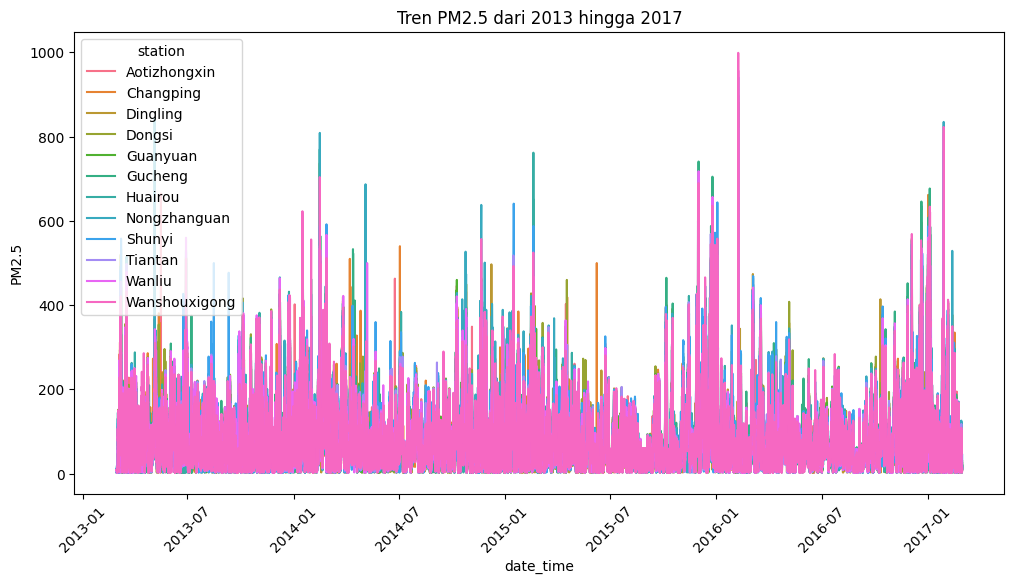

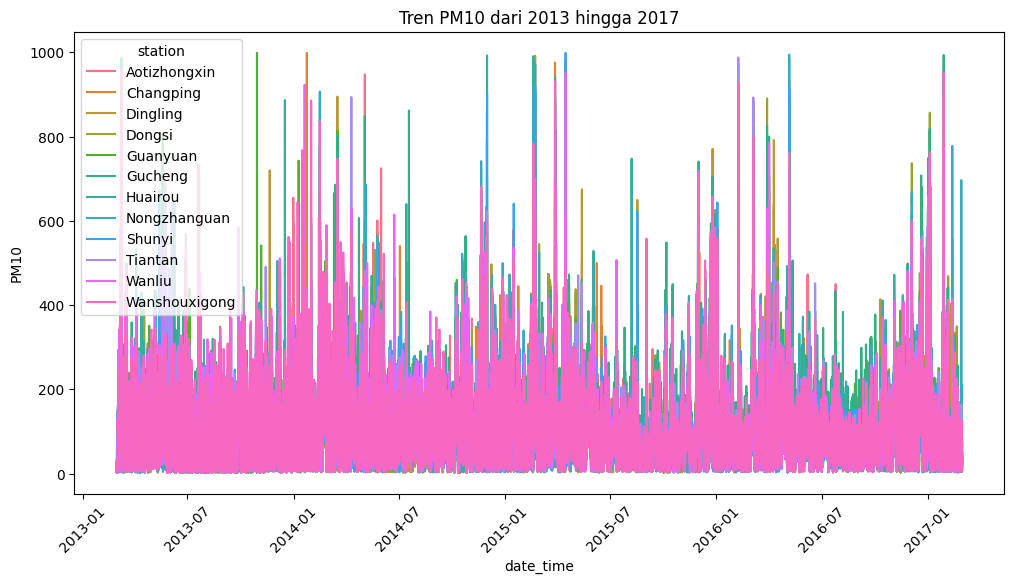

In [131]:
'''
1. Pola dan Tren Kualitas Udara dari 2013 hingga 2017
Untuk melihat bagaimana pola dan tren PM2.5 dan PM10 dari tahun 2013 hingga 2017 di berbagai stasiun

Visualisasi Tren PM2.5 dan PM10:
'''

# Plotting PM2.5 over time for all stations
plt.figure(figsize=(12,6))
sns.lineplot(x='date_time', y='PM2.5', hue='station', data=all_df, errorbar=None)
plt.title('Tren PM2.5 dari 2013 hingga 2017')
plt.xticks(rotation=45)
plt.show()

# Plotting PM10 over time for all stations
plt.figure(figsize=(12,6))
sns.lineplot(x='date_time', y='PM10', hue='station', data=all_df, errorbar=None)
plt.title('Tren PM10 dari 2013 hingga 2017')
plt.xticks(rotation=45)
plt.show()

d:\Dicoding - Data Scientist\Analysist Suhu Udara\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


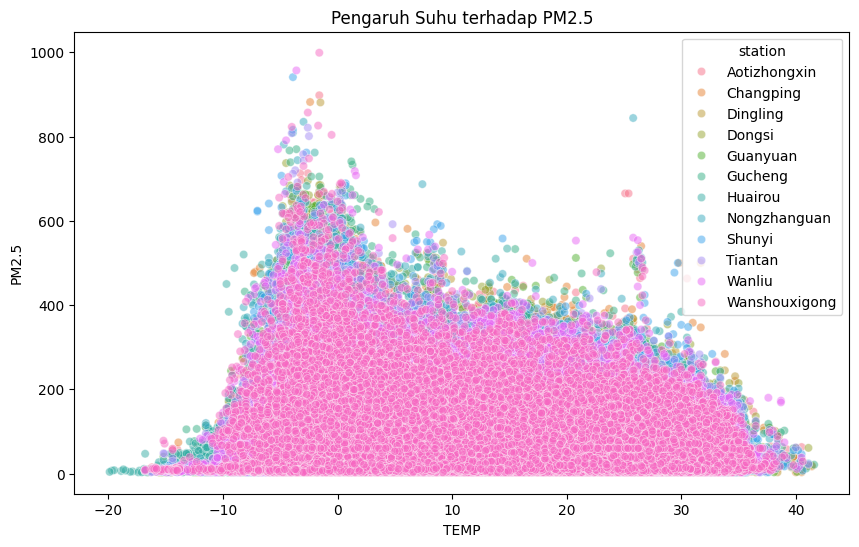

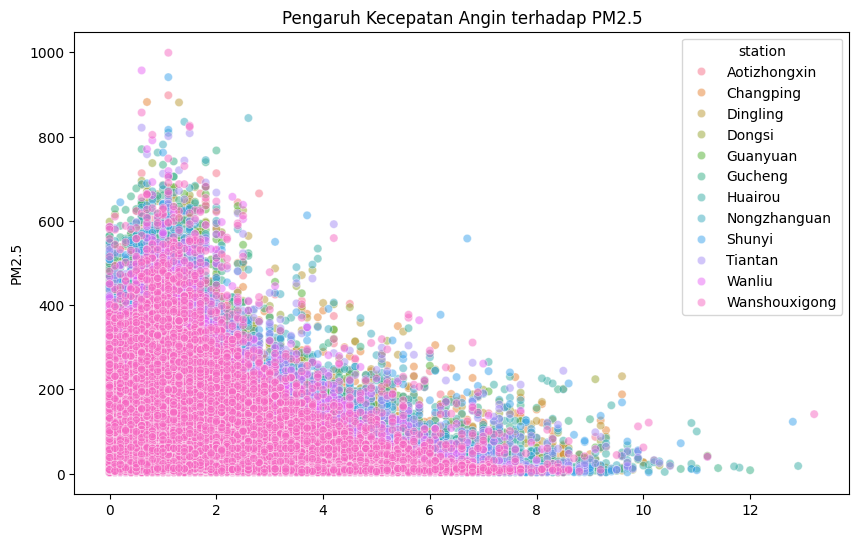

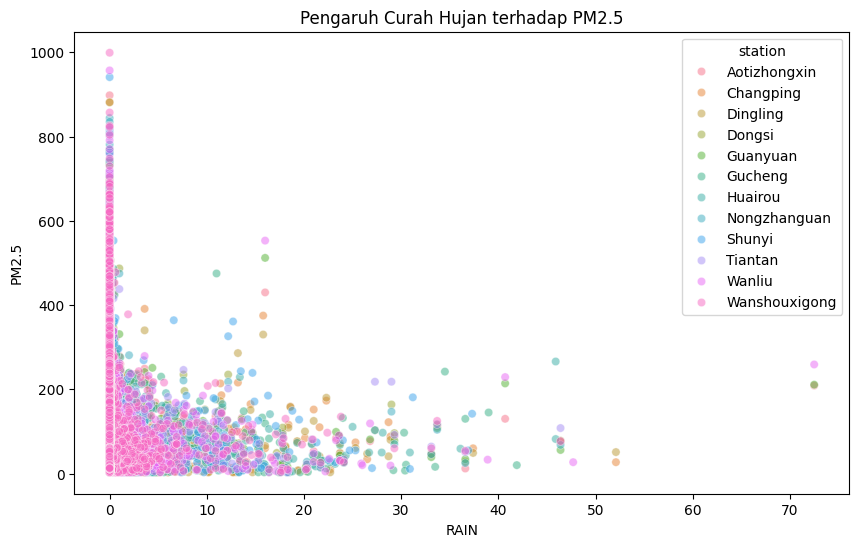

In [132]:
'''
2. Pengaruh Cuaca Terhadap Polusi
Lo bisa mengeksplorasi bagaimana suhu (TEMP), kecepatan angin (WSPM), dan curah hujan (RAIN) mempengaruhi konsentrasi polutan seperti PM2.5.
Untuk ini, kita bisa membuat scatter plot untuk melihat hubungan antara variabel cuaca dan polutan.
'''

# Scatter plot between Temperature and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='TEMP', y='PM2.5', hue='station', data=all_df, alpha=0.5)
plt.title('Pengaruh Suhu terhadap PM2.5')
plt.show()

# Scatter plot between Wind Speed and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='WSPM', y='PM2.5', hue='station', data=all_df, alpha=0.5)
plt.title('Pengaruh Kecepatan Angin terhadap PM2.5')
plt.show()

# Scatter plot between Rain and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='RAIN', y='PM2.5', hue='station', data=all_df, alpha=0.5)
plt.title('Pengaruh Curah Hujan terhadap PM2.5')
plt.show()



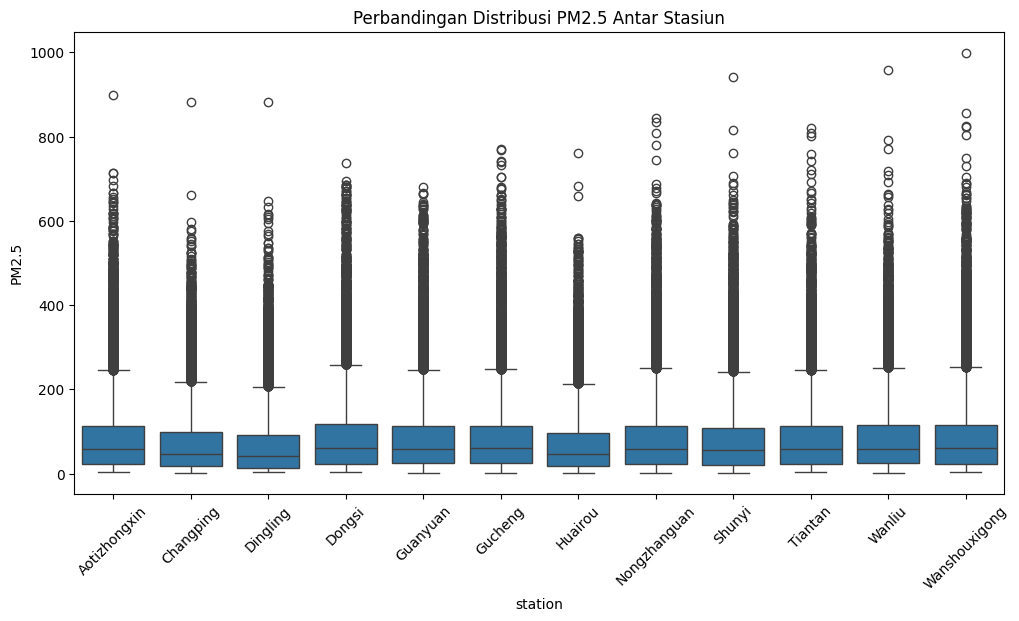

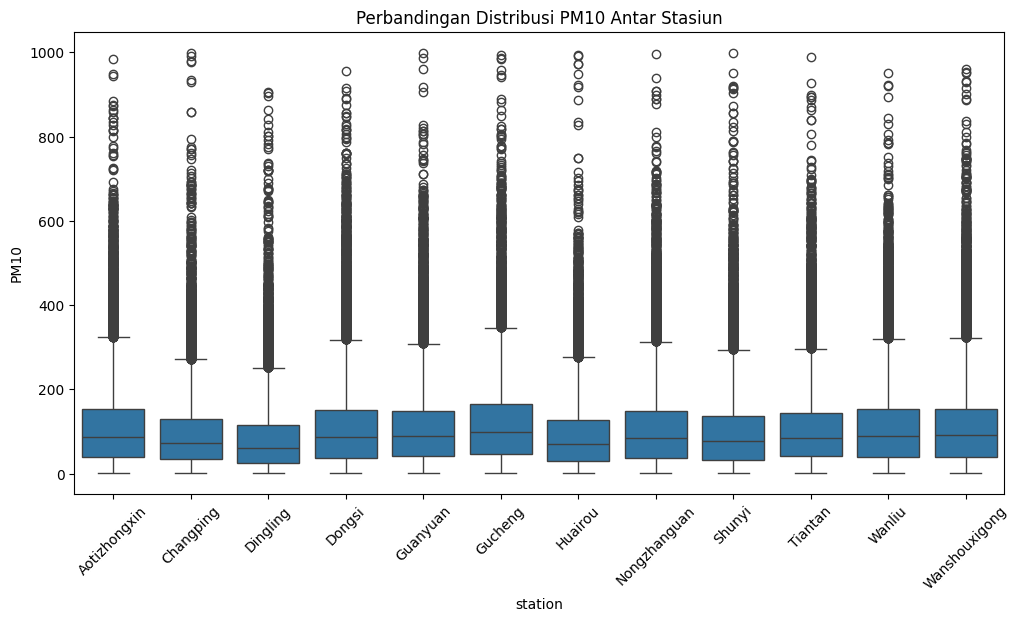

In [133]:
'''
3. Perbandingan Kualitas Udara di Berbagai Stasiun
Untuk membandingkan kualitas udara antar stasiun, lo bisa menggunakan boxplot untuk melihat bagaimana distribusi PM2.5 dan PM10 di setiap stasiun.
'''

# Boxplot untuk melihat distribusi PM2.5 di setiap stasiun
plt.figure(figsize=(12,6))
sns.boxplot(x='station', y='PM2.5', data=all_df)
plt.title('Perbandingan Distribusi PM2.5 Antar Stasiun')
plt.xticks(rotation=45)
plt.show()

# Boxplot untuk melihat distribusi PM10 di setiap stasiun
plt.figure(figsize=(12,6))
sns.boxplot(x='station', y='PM10', data=all_df)
plt.title('Perbandingan Distribusi PM10 Antar Stasiun')
plt.xticks(rotation=45)
plt.show()

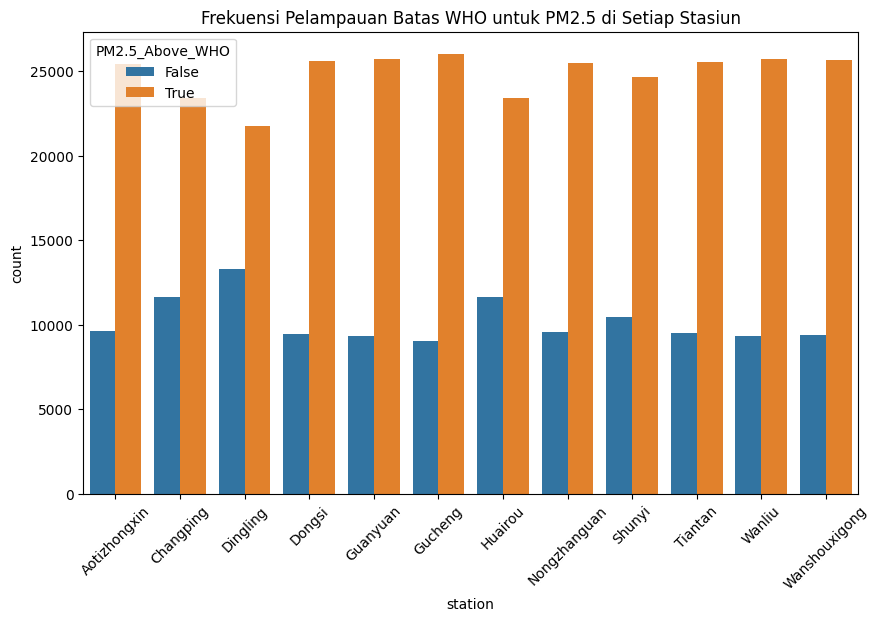

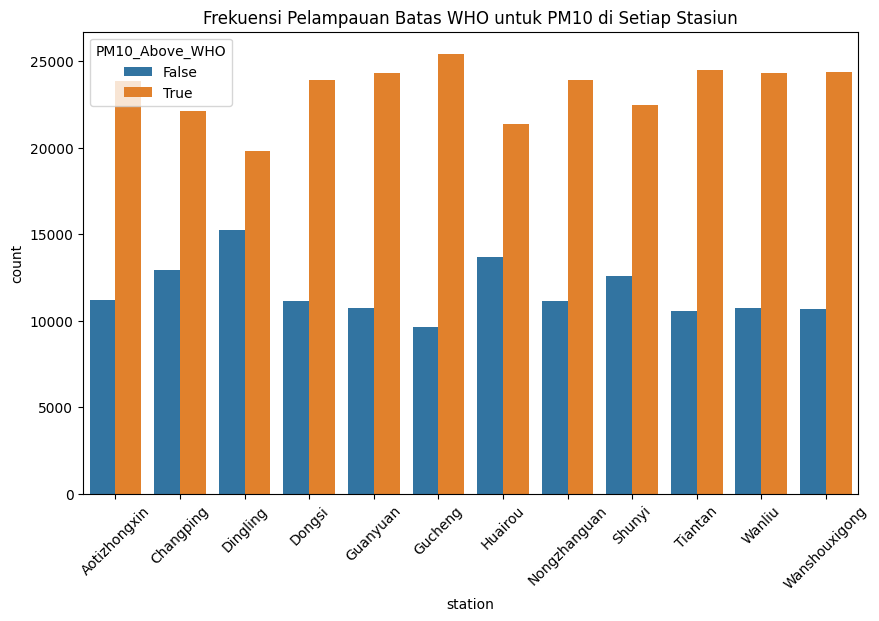

In [134]:
'''
4. Hubungan Antara PM2.5 dan PM10 dengan Dampak pada Kesehatan
Lo bisa melihat apakah ada banyak pelanggaran batas ambang WHO untuk polusi udara dengan cara memeriksa berapa kali konsentrasi PM2.5 dan PM10 melebihi standar WHO. WHO menetapkan bahwa:
'''

# Batas harian PM2.5 adalah 25 µg/m³.
# Batas harian PM10 adalah 50 µg/m³.

# Menghitung frekuensi pelampauan batas ambang WHO
all_df['PM2.5_Above_WHO'] = all_df['PM2.5'] > 25
all_df['PM10_Above_WHO'] = all_df['PM10'] > 50

# Plotting frequency of WHO threshold breaches for PM2.5 and PM10
plt.figure(figsize=(10,6))
sns.countplot(x='station', hue='PM2.5_Above_WHO', data=all_df)
plt.title('Frekuensi Pelampauan Batas WHO untuk PM2.5 di Setiap Stasiun')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='station', hue='PM10_Above_WHO', data=all_df)
plt.title('Frekuensi Pelampauan Batas WHO untuk PM10 di Setiap Stasiun')
plt.xticks(rotation=45)
plt.show()

# Analisis:
# Stasiun mana yang sering kali melampaui batas WHO untuk PM2.5 dan PM10?
# Apakah ada tren musiman yang menyebabkan peningkatan pelanggaran standar WHO di waktu-waktu tertentu?